## **Loading Dataset**

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_excel("ANZDATA.xlsx")
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [ ]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [ ]:
data=data[['txn_description','balance','gender','age','merchant_state','amount','customer_id']]

In [ ]:
data['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

## **Finding Mean Salary of each customer**

In [ ]:
salary = data[data["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean().reset_index()
salary=salary[['customer_id','amount']]
salary.rename(columns={'amount':'salary'},inplace=True)
salary
# data.txn_description

,customer_id,salary
0,CUS-1005756958,970.47
1,CUS-1117979751,3578.65
2,CUS-1140341822,1916.51
3,CUS-1147642491,1711.39
4,CUS-1196156254,3903.73
...,...,...
95,CUS-72755508,725.32
96,CUS-809013380,1037.07
97,CUS-860700529,1808.62
98,CUS-880898248,1433.98


In [ ]:
df=data.groupby('customer_id').mean().reset_index()
df=df[['customer_id','age','balance','amount']]
df.head()

,customer_id,age,balance,amount
0,CUS-1005756958,53,2275.852055,222.862603
1,CUS-1117979751,21,9829.929000,339.843700
2,CUS-1140341822,28,5699.212250,212.632500
3,CUS-1147642491,34,9032.841186,245.600169
4,CUS-1196156254,34,22272.433755,147.145796


In [ ]:
df=pd.merge(df,salary,on='customer_id')
df

,customer_id,age,balance,amount,salary
0,CUS-1005756958,53,2275.852055,222.862603,970.47
1,CUS-1117979751,21,9829.929000,339.843700,3578.65
2,CUS-1140341822,28,5699.212250,212.632500,1916.51
3,CUS-1147642491,34,9032.841186,245.600169,1711.39
4,CUS-1196156254,34,22272.433755,147.145796,3903.73
...,...,...,...,...,...
95,CUS-72755508,35,4497.557069,197.213276,725.32
96,CUS-809013380,21,3756.902903,151.694274,1037.07
97,CUS-860700529,30,3462.276009,77.681888,1808.62
98,CUS-880898248,26,8528.830385,146.954487,1433.98


## **Correlation between Salary & Age**

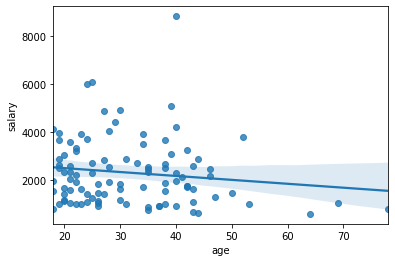

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure()
sns.regplot(x='age',y='salary',data=df)

## **Correlation between Salary & Balance**

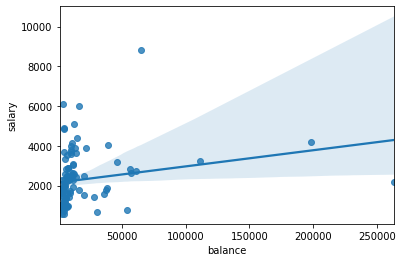

In [ ]:
plt.figure()
sns.regplot(x='balance',y='salary',data=df)

## **Correlation between Salary & Transaction Amount**

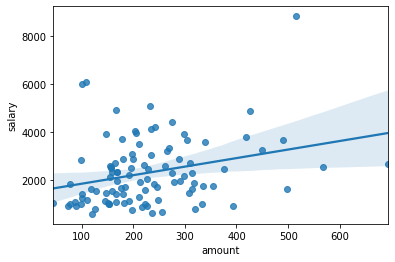

In [ ]:
plt.figure()
sns.regplot(x='amount',y='salary',data=df)

### **Mean POS for each customer**
It indicates spending behavior of customer

In [ ]:
pos = data[data["txn_description"]==("POS" or "SALES-POS")].groupby("customer_id").mean().reset_index()
pos=pos[['customer_id','amount']]
pos.rename(columns={'amount':'pos'},inplace=True)
pos

,customer_id,pos
0,CUS-1005756958,28.769615
1,CUS-1117979751,23.321923
2,CUS-1140341822,34.781282
3,CUS-1147642491,54.271316
4,CUS-1196156254,31.157432
...,...,...
95,CUS-72755508,25.022143
96,CUS-809013380,22.255098
97,CUS-860700529,28.164845
98,CUS-880898248,20.101429


### **Mean payment made by the customer**

In [ ]:
paym = data[data["txn_description"]=='PAYMENT'].groupby("customer_id").mean().reset_index()
paym=paym[['customer_id','amount']]
paym.rename(columns={'amount':'paym'},inplace=True)
paym

,customer_id,paym
0,CUS-1005756958,144.000000
1,CUS-1117979751,98.925000
2,CUS-1140341822,142.000000
3,CUS-1147642491,96.185185
4,CUS-1196156254,43.100000
...,...,...
95,CUS-72755508,1180.000000
96,CUS-809013380,70.136364
97,CUS-860700529,41.933333
98,CUS-880898248,77.500000


In [ ]:
df=pd.merge(df,pos,on='customer_id')
df=df=pd.merge(df,paym,on='customer_id')
df

,customer_id,age,balance,amount,salary,pos,paym
0,CUS-1005756958,53,2275.852055,222.862603,970.47,28.769615,144.000000
1,CUS-1117979751,21,9829.929000,339.843700,3578.65,23.321923,98.925000
2,CUS-1140341822,28,5699.212250,212.632500,1916.51,34.781282,142.000000
3,CUS-1147642491,34,9032.841186,245.600169,1711.39,54.271316,96.185185
4,CUS-1196156254,34,22272.433755,147.145796,3903.73,31.157432,43.100000
...,...,...,...,...,...,...,...
95,CUS-72755508,35,4497.557069,197.213276,725.32,25.022143,1180.000000
96,CUS-809013380,21,3756.902903,151.694274,1037.07,22.255098,70.136364
97,CUS-860700529,30,3462.276009,77.681888,1808.62,28.164845,41.933333
98,CUS-880898248,26,8528.830385,146.954487,1433.98,20.101429,77.500000


In [ ]:
X=df[["age","balance","paym","pos",'amount']].values
y=df["salary"].values
X

array([[5.30000000e+01, 2.27585205e+03, 1.44000000e+02, 2.87696154e+01,
        2.22862603e+02],
       [2.10000000e+01, 9.82992900e+03, 9.89250000e+01, 2.33219231e+01,
        3.39843700e+02],
       [2.80000000e+01, 5.69921225e+03, 1.42000000e+02, 3.47812821e+01,
        2.12632500e+02],
       [3.40000000e+01, 9.03284119e+03, 9.61851852e+01, 5.42713158e+01,
        2.45600169e+02],
       [3.40000000e+01, 2.22724338e+04, 4.31000000e+01, 3.11574324e+01,
        1.47145796e+02],
       [2.50000000e+01, 8.47579600e+03, 7.27500000e+01, 6.65507407e+01,
        2.74614800e+02],
       [4.40000000e+01, 4.92385364e+03, 3.30428571e+02, 3.29445455e+01,
        2.36035000e+02],
       [3.00000000e+01, 5.00394051e+03, 8.82272727e+01, 2.57627187e+02,
        2.48545128e+02],
       [2.00000000e+01, 5.44833457e+03, 6.90000000e+01, 2.39560563e+01,
        1.09833216e+02],
       [2.10000000e+01, 5.55392947e+03, 1.93000000e+02, 5.48545455e+01,
        2.26721184e+02],
       [5.20000000e+01, 1.0162

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.22618999424104244

In [ ]:
lr.score(X_test, y_test)

0.15445953133318369

## **Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
dtc = DecisionTreeRegressor()
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train)

1.0

In [ ]:
dtc.predict(X_test)

array([2280.36, 2639.76, 1395.49, 1002.13, 1436.98, 1395.49, 1395.49,
       3026.95, 1395.49, 3712.56, 3903.73, 2485.37, 1059.84, 2282.36,
        982.71, 2485.37, 2218.73,  920.71, 4405.3 , 2840.15, 3231.26,
       1436.98, 2282.36, 1681.58, 2218.73, 2687.85,  664.43, 2639.76,
       2280.36, 3712.56])

In [ ]:
dtc.score(X_test, y_test)

-0.4123734730873476